In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Inputed data from excel into table (hotel_bookings(1))
#data = pd.read_csv('data.csv')
data = pd.read_csv('hotel_bookings.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119390,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119391,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119392,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [3]:
# Created a column with my three variables
# My original business question - "Which countries generate the most revenue for the hotel, and how does cancellation behavior vary across those countries?"
columns = ['country', 'adr', 'is_canceled']
selected_data = data[columns]
selected_data

,country,adr,is_canceled
0,PRT,0.00,0.0
1,PRT,0.00,0.0
2,GBR,75.00,0.0
3,GBR,75.00,0.0
4,GBR,98.00,0.0
...,...,...,...
119389,BEL,96.14,0.0
119390,FRA,225.43,0.0
119391,DEU,157.71,0.0
119392,GBR,104.40,0.0


In [4]:
# Table showing the country which made the most reservations 
country_counts = data['country'].value_counts()
top = country_counts.head(20).reset_index()
top.columns = ['Country', 'Count']

print(top)

   Country  Count
0      PRT  48592
1      GBR  12129
2      FRA  10415
3      ESP   8568
4      DEU   7287
5      ITA   3768
6      IRL   3375
7      BEL   2342
8      BRA   2224
9      NLD   2104
10     USA   2097
11     CHE   1730
12      CN   1279
13     AUT   1263
14     SWE   1024
15     CHN    999
16     POL    919
17     ISR    669
18     RUS    632
19     NOR    607


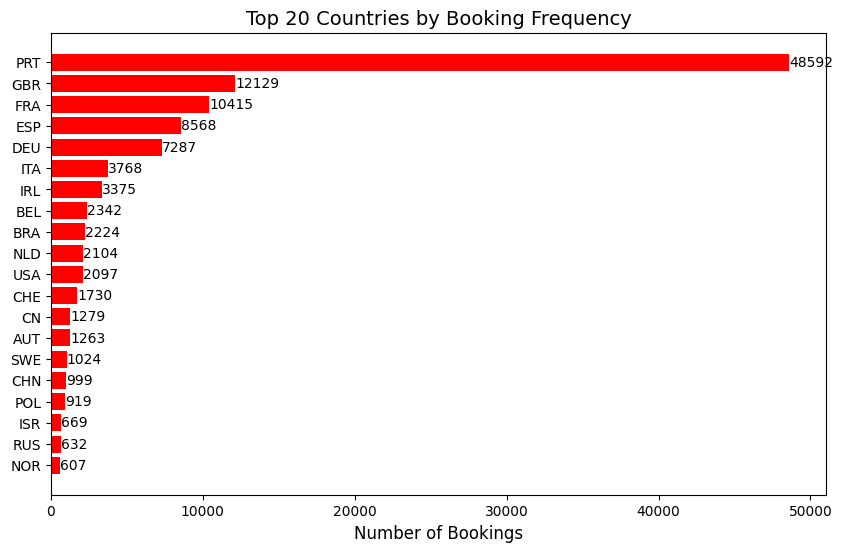

In [5]:
# Bar graph displaying results from the table above
plt.figure(figsize=(10, 6))
bars = plt.barh(top['Country'], top['Count'], color='red')

# Invert y-axis so the highest count is at the top
plt.gca().invert_yaxis()

# Adding labels and title
plt.xlabel('Number of Bookings', fontsize=12)
plt.title('Top 20 Countries by Booking Frequency', fontsize=14)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', fontsize=10)

# Display the chart
plt.show()


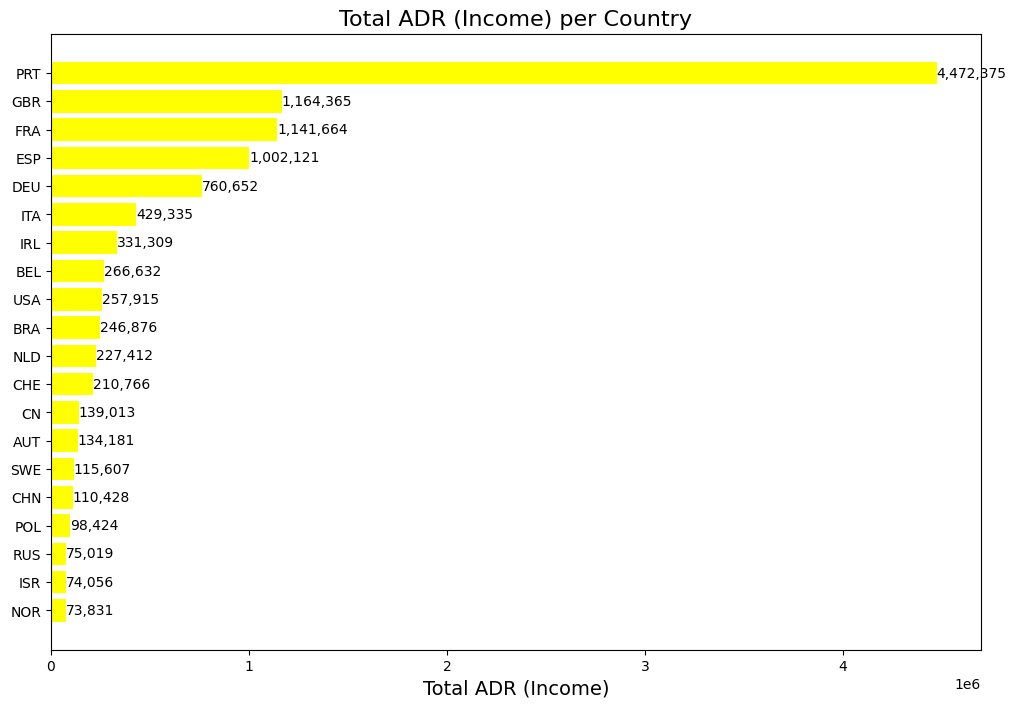

In [6]:
# Bar graph displaying the average daily rate (price per room) for the booking for the top 20 countries
total_adr_per_country = data.groupby('country')['adr'].sum().reset_index()

# Rename the column for clarity and sort adr in descending order
total_adr_per_country = total_adr_per_country.rename(columns={'adr': 'Total_ADR_Income'})
total_adr_per_country = total_adr_per_country.sort_values(by='Total_ADR_Income', ascending=False)
total_adr_per_country = total_adr_per_country.head(20)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(total_adr_per_country['country'], total_adr_per_country['Total_ADR_Income'], color='yellow')

# Invert y-axis so that the country with the highest income is at the top
plt.gca().invert_yaxis()

# Set labels and title with adr value
plt.xlabel('Total ADR (Income)', fontsize=14)
plt.title('Total ADR (Income) per Country', fontsize=16)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', va='center', fontsize=10)

plt.show()


In [7]:
# table displaying the countries with the highest adr average 
avg_adr = data.groupby('country')['adr'].mean()
avg_adr_per_country = avg_adr.reset_index()
avg_adr_per_country = avg_adr_per_country.rename(columns={'adr': 'average_adr'})
avg_adr_per_country = avg_adr_per_country.sort_values(by='average_adr', ascending=False)
avg_adr_per_country

,country,average_adr
44,DJI,273.000000
2,AIA,265.000000
4,AND,202.652857
167,UMI,200.000000
93,LAO,181.665000
...,...,...
8,ASM,72.070000
21,BHS,50.850000
14,BDI,46.000000
105,MDG,44.000000


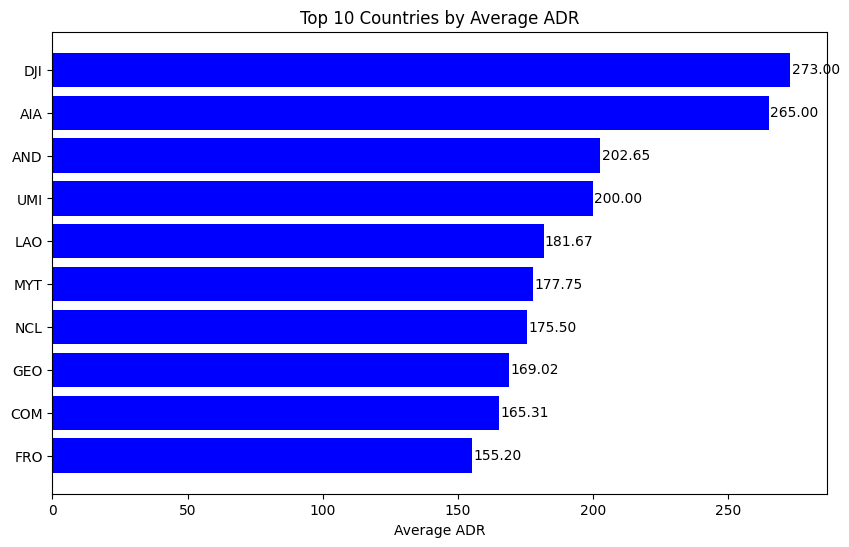

In [8]:
# Bar chart displaying data from the table above (top 10 average adr) 
plt.figure(figsize=(10, 6))
top10 = avg_adr_per_country.head(10)
bars = plt.barh(top10['country'], top10['average_adr'], color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Average ADR')
plt.title('Top 10 Countries by Average ADR')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', fontsize=10)
plt.show()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [9]:
# Table displaying booking cancellations for each country and their percentage of cancellation
grouped = data.groupby('country')

# Calculate the total number of bookings and cancellations per country
total_bookings = grouped['is_canceled'].count()
cancellations = grouped['is_canceled'].sum()
cancellation_percentage = (cancellations / total_bookings) * 100

# Combine the results into one DataFrame
cancel_stats = pd.DataFrame({
    'Total_Bookings': total_bookings,
    'Cancellation_Count': cancellations,
    'Cancellation_Percentage': cancellation_percentage
})

# Sort the DataFrame by cancellation percentage in descending order
cancel_stats_sorted = cancel_stats.sort_values(by='Cancellation_Percentage', ascending=False)
cancel_stats_sorted


,Total_Bookings,Cancellation_Count,Cancellation_Percentage
country,,,
BEN,3,3.0,100.0
MYT,2,2.0,100.0
KHM,2,2.0,100.0
JEY,8,8.0,100.0
IMN,2,2.0,100.0
...,...,...,...
SLE,1,0.0,0.0
SMR,1,0.0,0.0
SLV,2,0.0,0.0


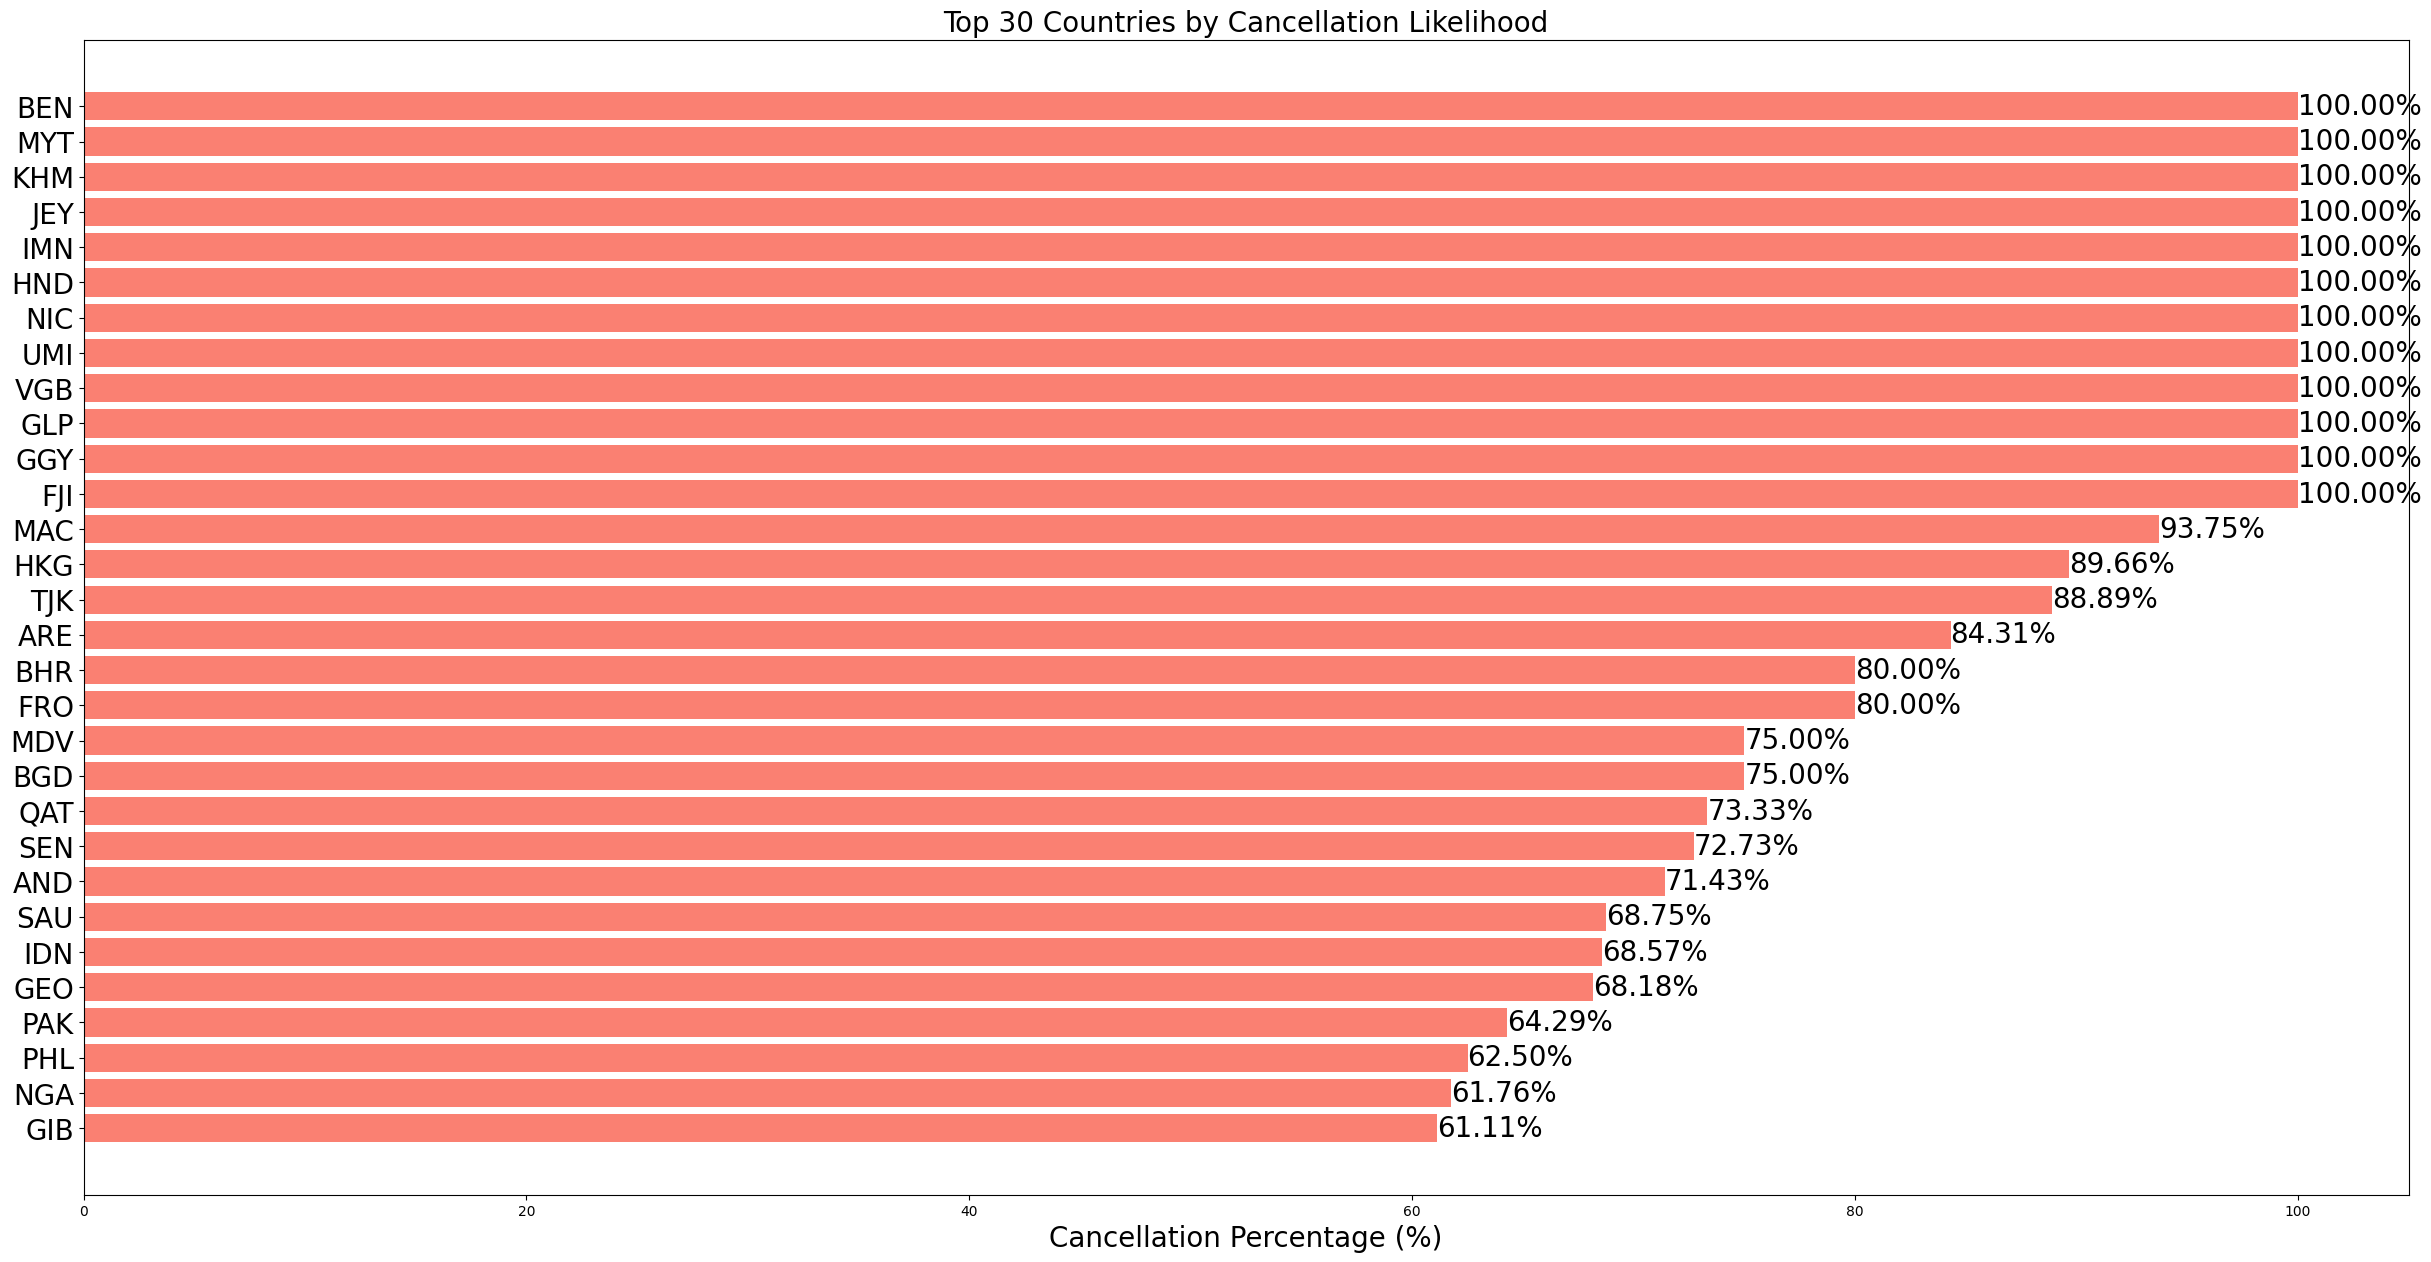

In [10]:
# Bar chart to visualize the top 10 countries by cancellation percentage.
plt.figure(figsize=(30, 15))
top10 = cancel_stats_sorted.head(30)
bars = plt.barh(top10.index, top10['Cancellation_Percentage'], color='salmon')
plt.gca().invert_yaxis()  # Ensures the highest percentage appears at the top.
plt.xlabel('Cancellation Percentage (%)', fontsize=20)
plt.title('Top 30 Countries by Cancellation Likelihood', fontsize=20)
plt.yticks(fontsize=20)

# Annotate each bar with its percentage value
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', fontsize=20)

plt.show()


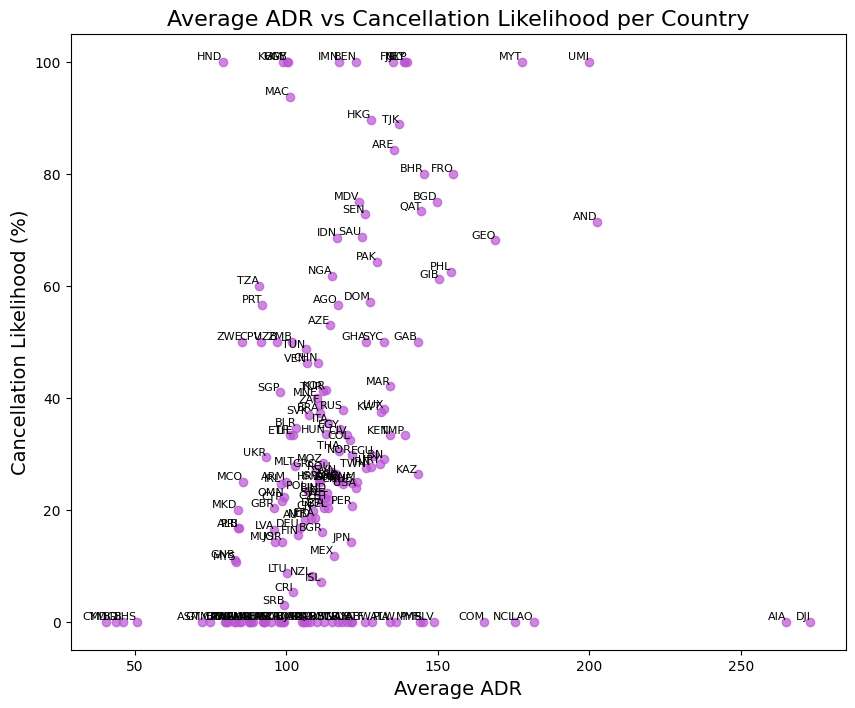

In [11]:
# Scatter plot displaying the avg adr versus the cancellation likelihood per country
metrics = pd.DataFrame({
    'Country': avg_adr.index,
    'Average_ADR': avg_adr.values,
    'Cancellation_Percentage': cancellation_percentage.values
})

# Average ADR (x-axis) vs Cancellation Likelihood (y-axis)
plt.figure(figsize=(10, 8))
plt.scatter(metrics['Average_ADR'], metrics['Cancellation_Percentage'], color='mediumorchid', alpha=0.7)

# Label the axes and add a title
plt.xlabel('Average ADR', fontsize=14)
plt.ylabel('Cancellation Likelihood (%)', fontsize=14)
plt.title('Average ADR vs Cancellation Likelihood per Country', fontsize=16)

# Name each plot with its country
for idx, row in metrics.iterrows():
    plt.text(row['Average_ADR'], row['Cancellation_Percentage'], row['Country'], fontsize=8, ha='right', va='bottom')

plt.show()


# Does a higher Average Daily Rate (ADR) correlate with an increased likelihood of cancellation across different countries, and what insights can hotels derive from this relationship?

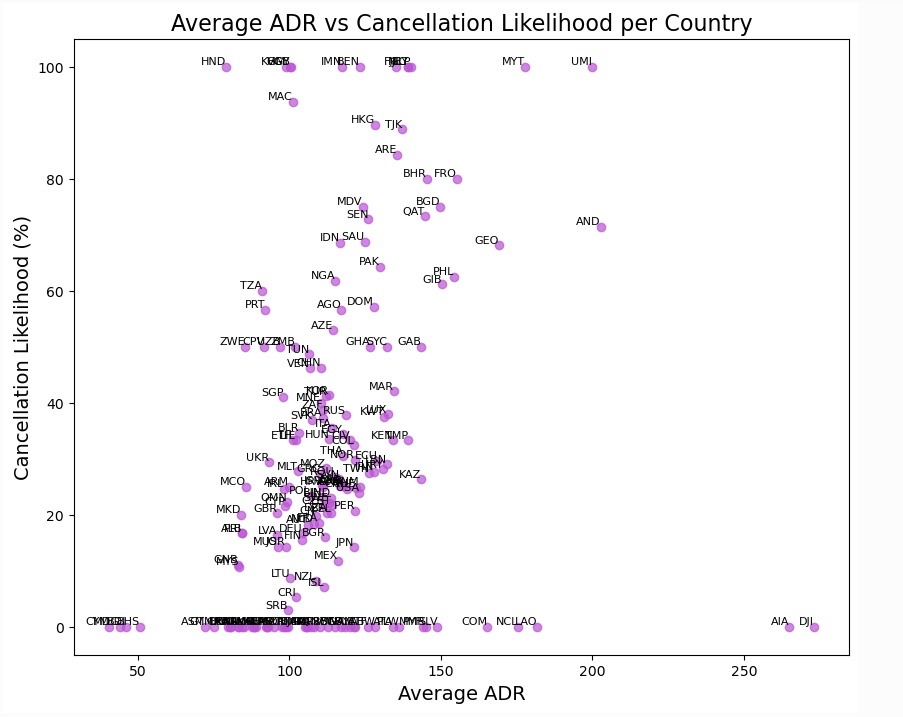

The scatter plot displaying the average ADR on the x-axis versus cancellation likelihood on the y-axis shows each country’s position according to these two metrics. While some countries with higher adr levels (above 100–150) exhibit moderate to high cancellation likelihood (around 30–50%), the overall distribution suggests that there is no simple, uniform correlation between price point and cancellation rates. 
Countries with similar adr values sometimes display notably different cancellation percentages, highlighting the influence of additional factors, such as regional booking behaviours, cancellation policies, or market conditions. 

From a practical standpoint, hotels cannot assume that simply raising or lowering the ADR will directly and straightforwardly impact cancellation rates. 
Instead, they should consider a more nuanced approach: 
- Targeted Policies: Regions with high ADR and cancellation rates might benefit from stricter cancellation policies or targeted promotions to incentivize commitment. 
- Market-Specific Analysis: For countries displaying relatively low cancellations despite higher ADR, there may be an opportunity to maintain premium pricing or offer to upsell packages. 

Identifying outliers—where moderate adr coexists with extreme cancellation rates, it can uncover unique local factors, such as travel restrictions or cultural booking patterns. 
Overall, the scatter plot implies that multiple variables beyond room price alone shape cancellation behaviour. Hotels would be well-advised to integrate this ADR-cancellation insight into broader revenue and marketing strategies for each country or market segment.

Overall mark: 60

#### Business Question:
A relevant business question is clearly identified. However, why answering the question is useful for the hotel industry is not explicitly addressed. Using findings and implications are derived from the given dataset

<u>Good</u>

#### Data:
Three variables, 'country', 'adr', 'is_canceled', are identified to answer the question according to the code. It is suggested to address the variable selection in the report as well. Also, the justification of employing these variables is not effectively addressed. Some basic data analysis techniques, such as counting, transformation using calculation and sorting, are used, which reflects basic understanding of data manipulation. The data analysis is efficient enough to answer the question proposed.

<u>Good</u>

#### Visualization:
Multiple plots are used for the visualization purpose, though most of them are basic bar charts. All plots come with essential elements of title, axis labels and ticks. It is suggested that the figure size for the plot of Top 30 countries by cancellation rate can be set to larger for better readability. Moreover, the data analysis might be biased due to the small sample effects, which leads to some outliers in the scatter plots.

<u>Good</u>

#### Code:
The structure of the code is clean and easy to follow. There are no obvious errors, except a minor issue in importing the data file (you should use 'hotel_bookings.csv' instead of 'data.csv'). Code comes with necessary comments. It is suggested to put the code for plotting together after all data analysis code, which could improve the readability.

<u>Good</u>